# Project: Investigate a Dataset - [TMDB-Movies]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Data Overview

>I will use the TMDB-movie dataset to complete my data analysis project.
This dataset contains information about his 10,000 movies (including revenue) collected by The Movie Database (TMDB). It consists of 10866 rows and 21 columns such as imdb_id, revenue, budget_adj, vote_count.


### Question(s) for Analysis
> 1.  Movies with largest and lowest budgets
> 2.  Movies with most and least earned revenue..
> 3.  The most popular long-running films, according to their popularity
> 4.  Average runtime of all the movies.
> 5.  Year has the highest release of movies
> 6.  Month released highest number of movies in all of years
> 7.  Year of release vs popularity
> 8.  Popularity depends on profit
> 9.  The relationship between runtime and vote average
> 10. Vote average changes according to the release year.
> 11. Features are associated with movies with high revenue

<a id='wrangling'></a>
## Data Wrangling

>After reviewing your dataset and suggested questions for analysis, keep only relevant data and remove unused data to keep your calculations simple and easy to understand.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### General Properties

In [2]:
# Load your data and print out a few lines. Perform operations to inspect data
# types and look for instances of missing or possibly errant data.
df = pd.read_csv('tmdb-movies.csv')
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


### Assessing Data

In [3]:
#How many samples of tmdb-movies are there?
#How many columns are in each dataset?

df.shape

(10866, 21)

In [4]:
#Which features have missing values?
df.isna().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

In [5]:
#How many duplicate rows are in the dataset?
df.duplicated().sum()

1

In [6]:
#What is the mean density in the dataset?
df.dtypes

id                        int64
imdb_id                  object
popularity              float64
budget                    int64
revenue                   int64
original_title           object
cast                     object
homepage                 object
director                 object
tagline                  object
keywords                 object
overview                 object
runtime                   int64
genres                   object
production_companies     object
release_date             object
vote_count                int64
vote_average            float64
release_year              int64
budget_adj              float64
revenue_adj             float64
dtype: object

In [7]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09



### Data Cleaning
> 1. Removing columns with null values
> 2. Removing the duplicacy in the rows(if any).
> 3. Changing release date column into date format.
> 4. Replacing zero with NAN in TMDB-movies data set and fill NAN values with mean.

In [8]:
# After discussing the structure of the data and any problems that need to be
#   cleaned, perform those cleaning steps in the second part of this section.
# Removing columns with null values

df.drop(['imdb_id', 'cast', 'homepage', 'director', 'tagline', 'keywords', 'overview', 'genres', 'production_companies'], axis = 1, inplace = True)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              10866 non-null  int64  
 1   popularity      10866 non-null  float64
 2   budget          10866 non-null  int64  
 3   revenue         10866 non-null  int64  
 4   original_title  10866 non-null  object 
 5   runtime         10866 non-null  int64  
 6   release_date    10866 non-null  object 
 7   vote_count      10866 non-null  int64  
 8   vote_average    10866 non-null  float64
 9   release_year    10866 non-null  int64  
 10  budget_adj      10866 non-null  float64
 11  revenue_adj     10866 non-null  float64
dtypes: float64(4), int64(6), object(2)
memory usage: 1018.8+ KB


In [9]:
df.shape

(10866, 12)

In [10]:
df.isna().sum()

id                0
popularity        0
budget            0
revenue           0
original_title    0
runtime           0
release_date      0
vote_count        0
vote_average      0
release_year      0
budget_adj        0
revenue_adj       0
dtype: int64

In [11]:
df.drop_duplicates(inplace=True)

In [12]:
df.duplicated().sum()

0

In [13]:
df.release_date = pd.to_datetime(df['release_date'])

In [14]:
df.head()

,id,popularity,budget,revenue,original_title,runtime,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,32.985763,150000000,1513528810,Jurassic World,124,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,28.419936,150000000,378436354,Mad Max: Fury Road,120,2015-05-13,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,13.112507,110000000,295238201,Insurgent,119,2015-03-18,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,11.173104,200000000,2068178225,Star Wars: The Force Awakens,136,2015-12-15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,9.335014,190000000,1506249360,Furious 7,137,2015-04-01,2947,7.3,2015,1.747999e+08,1.385749e+09


In [15]:
df =df.replace(0, np.NAN)

In [16]:
df.isnull().sum()

id                   0
popularity           0
budget            5696
revenue           6016
original_title       0
runtime             31
release_date         0
vote_count           0
vote_average         0
release_year         0
budget_adj        5696
revenue_adj       6016
dtype: int64

In [17]:
df.fillna(df.mean(), inplace=True)

C:\Users\Trojan\AppData\Local\Temp/ipykernel_7484/820435583.py:1: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  df.fillna(df.mean(), inplace=True)
C:\Users\Trojan\AppData\Local\Temp/ipykernel_7484/820435583.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.fillna(df.mean(), inplace=True)


In [18]:
df.isnull().sum()

id                0
popularity        0
budget            0
revenue           0
original_title    0
runtime           0
release_date      0
vote_count        0
vote_average      0
release_year      0
budget_adj        0
revenue_adj       0
dtype: int64

<a id='eda'></a>
## Exploratory Data Analysis

### Distribution of dataset

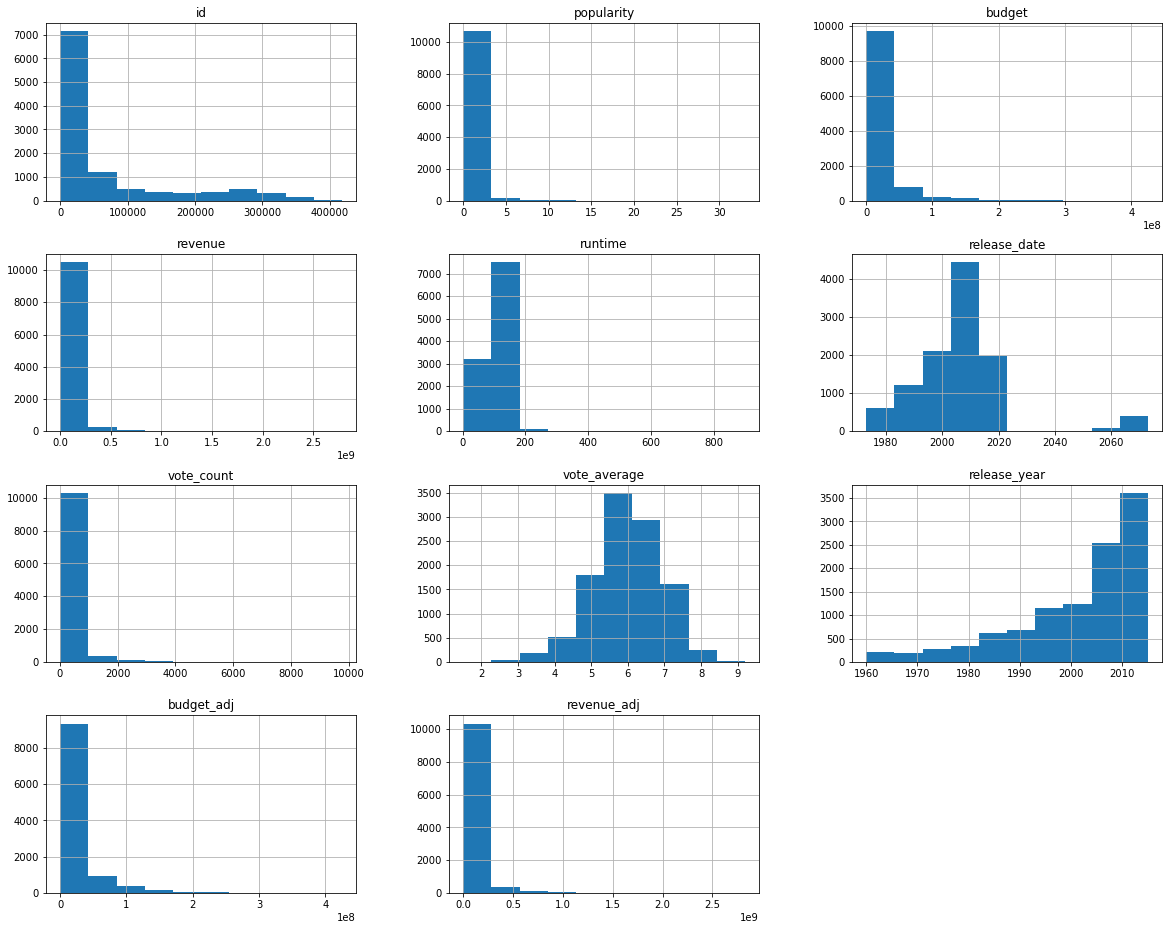

In [19]:
df.hist(figsize=(20,16));

### Research Question 1  (Movies with largest and lowest budgets)

In [20]:
# Continue to explore the data to address your additional research
#   questions. Add more headers as needed if you have more questions to
#   investigate.
def calculate(column):
    high= df[column].idxmax()
    high_details=pd.DataFrame(df.loc[high])
    
    low= df[column].idxmin()
    low_details=pd.DataFrame(df.loc[low])
    
    info=pd.concat([high_details, low_details], axis=1)
    
    return info

In [21]:
calculate('budget')

,2244,1151
id,46528,287524
popularity,0.25054,0.177102
budget,425000000.0,1.0
revenue,11087569.0,89238858.707981
original_title,The Warrior's Way,Fear Clinic
runtime,100.0,95.0
release_date,2010-12-02 00:00:00,2014-10-31 00:00:00
vote_count,74,15
vote_average,6.4,4.1
release_year,2010,2014


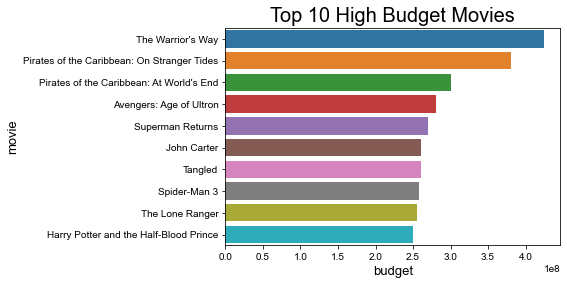

In [22]:
#top 10 movies which earned most revenue.
#sort the 'revenue' column in decending order and store it in the new dataframe.
info = pd.DataFrame(df['budget'].sort_values(ascending = False))
info['original_title'] = df['original_title']
data = list(map(str,(info['original_title'])))

#extract the top 10 movies with high revenue data from the list and dataframe.
x = list(data[:10])
y = list(info['budget'][:10])

#make the point plot and setup the title and labels.
T= sns.barplot(x=y,y=x)
T.set_title("Top 10 High Budget Movies",fontsize = 20)
T.set_xlabel("budget",fontsize = 13)
T.set_ylabel("movie",fontsize = 13)

sns.set_style("darkgrid",rc={'figure.figsize':(20,5)})

##### >>> Column with id 2244 shows the largest budget i.e 425000000.

##### >>> As we can see that the Movie Which Has Highest budget is The Warrior's Way and the Movie Which Has Lowest budget is Fear Clinic

### Research Question 2 (Movies with most earned revenue.)

In [23]:
calculate('revenue')

,1386,5067
id,19995,13537
popularity,9.432768,0.462609
budget,237000000.0,6000000.0
revenue,2781505847.0,2.0
original_title,Avatar,Shattered Glass
runtime,162.0,94.0
release_date,2009-12-10 00:00:00,2003-11-14 00:00:00
vote_count,8458,46
vote_average,7.1,6.4
release_year,2009,2003


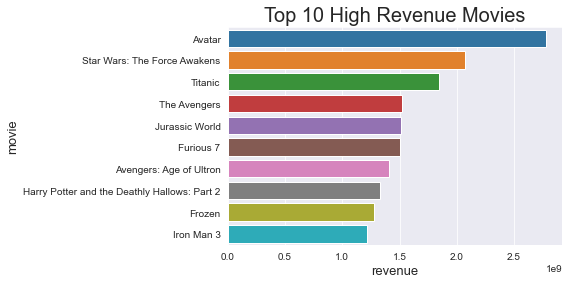

In [24]:
#top 10 movies which earned most revenue.
#sort the 'revenue' column in decending order and store it in the new dataframe.
info = pd.DataFrame(df['revenue'].sort_values(ascending = False))
info['original_title'] = df['original_title']
data = list(map(str,(info['original_title'])))

#extract the top 10 movies with high revenue data from the list and dataframe.
x = list(data[:10])
y = list(info['revenue'][:10])

T= sns.barplot(x=y,y=x)

T.set_title("Top 10 High Revenue Movies",fontsize = 20)
T.set_xlabel("revenue",fontsize = 13)
T.set_ylabel("movie",fontsize = 13)

sns.set_style("darkgrid",rc={'figure.figsize':(20,5)})

##### >>> Column with id 1386 shows the largest revenue earned i.e 2781505847.

##### >>> Whereas the column with id 5067 shows the smallest revenue earned i.e 2.

##### >>> As we can see that 'Avatar' movie earn the highest profit in all, making over 2.5B in profit in this dataset.

### Research Question 3 (The most popular long-running films, according to their popularity)

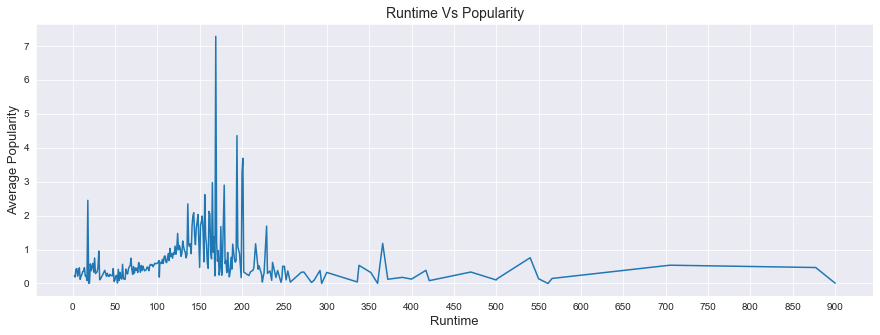

In [25]:
df.groupby('runtime')['popularity'].mean().plot(figsize = (15,5),xticks=np.arange(0,950,50))
plt.title("Runtime Vs Popularity",fontsize = 14)

plt.xlabel('Runtime',fontsize = 13)
plt.ylabel('Average Popularity',fontsize = 13)

sns.set(rc={'figure.figsize':(15,10)})
sns.set_style("darkgrid")

##### >>> According to the plot we can say that movies in the range of 150-200 runtime are more popular than other runtime movies.

##### >>> Because it is boring to see the long duration movies.

### Research Question 4 (Average runtime of all the movies.)

In [26]:
 df['runtime'].mean()

102.36385453202878

##### >>>So the average runtime a movie is 109 minutes.

### Research Question 5 (Year has the highest release of movies)

In [27]:
year_movies=df.groupby('release_year').count()['id']

In [28]:
year_movies

release_year
1960     32
1961     31
1962     32
1963     34
1964     42
1965     35
1966     46
1967     40
1968     39
1969     31
1970     41
1971     55
1972     40
1973     55
1974     47
1975     44
1976     47
1977     57
1978     65
1979     57
1980     78
1981     82
1982     81
1983     80
1984    105
1985    109
1986    121
1987    125
1988    145
1989    137
1990    132
1991    133
1992    133
1993    178
1994    184
1995    175
1996    204
1997    192
1998    210
1999    224
2000    227
2001    242
2002    266
2003    281
2004    307
2005    364
2006    408
2007    438
2008    496
2009    533
2010    489
2011    540
2012    588
2013    659
2014    700
2015    629
Name: id, dtype: int64

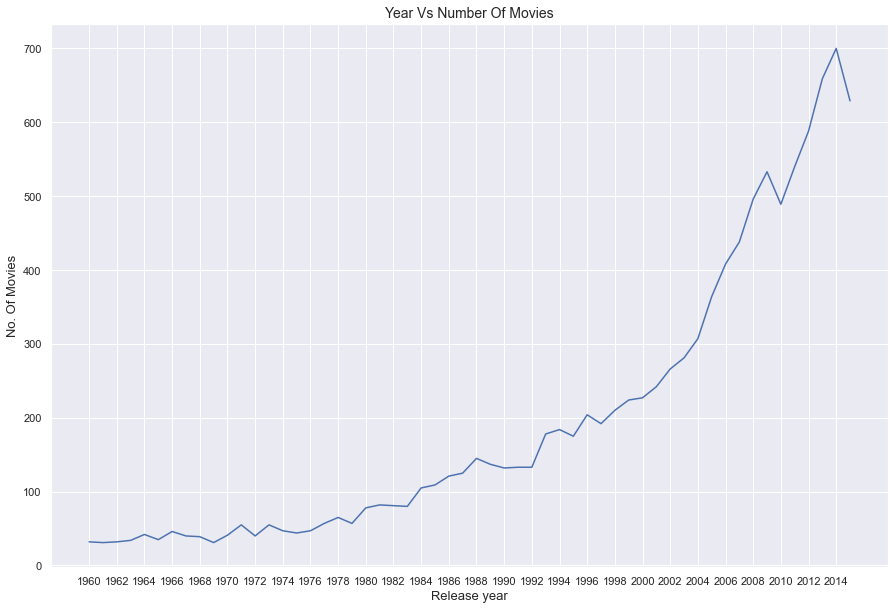

In [29]:
year_movies.plot(xticks = np.arange(1960,2016,2))

plt.xlabel('Release year',fontsize = 13)
plt.ylabel('No. Of Movies',fontsize = 13)
plt.title("Year Vs Number Of Movies",fontsize = 14)
sns.set_style("darkgrid",rc={'figure.figsize':(15,5)})

#####                                                  >>>      Year that has the highest release of movies is 2014 => 700 movies

### Research Question 6 (Month released highest number of movies in all of years)

In [30]:
number_of_release=df['release_date'].dt.month.value_counts().sort_index()
number_of_release

1      919
2      691
3      822
4      797
5      809
6      827
7      799
8      918
9     1331
10    1153
11     814
12     985
Name: release_date, dtype: int64

Text(0, 0.5, 'Number of movie releases')

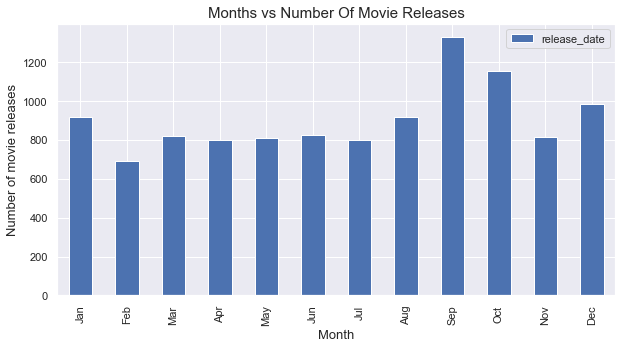

In [31]:
months=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
number_of_release = pd.DataFrame(number_of_release)
number_of_release['month'] = months

number_of_release.plot(x='month',kind='bar',fontsize = 11,figsize=(10,5))
plt.title('Months vs Number Of Movie Releases',fontsize = 15)

plt.xlabel('Month',fontsize = 13)
plt.ylabel('Number of movie releases',fontsize = 13)

#####    >>> According to the plot we can conclude that there are higher number of release in september and october month.


### Research Question 7 (Year of release vs popularity)

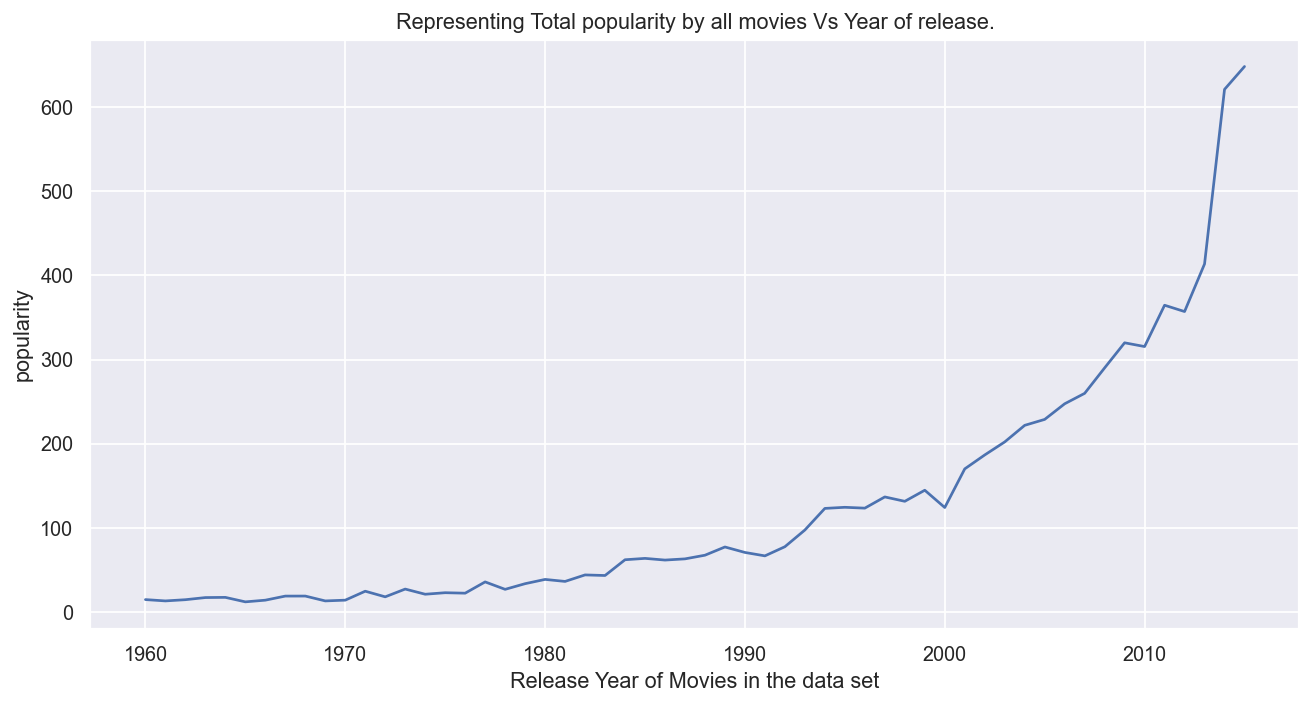

In [32]:
popularity_year = df.groupby('release_year')['popularity'].sum()
plt.figure(figsize=(12,6), dpi = 130)

plt.xlabel('Release Year of Movies in the data set', fontsize = 12)
plt.ylabel('popularity', fontsize = 12)

plt.title('Representing Total popularity by all movies Vs Year of release.')

plt.plot(popularity_year)

plt.show()

### Reasearch Question 8 (Popularity depends on profit)

Correlation Between Popularity And Profit :  0.5347793083527715


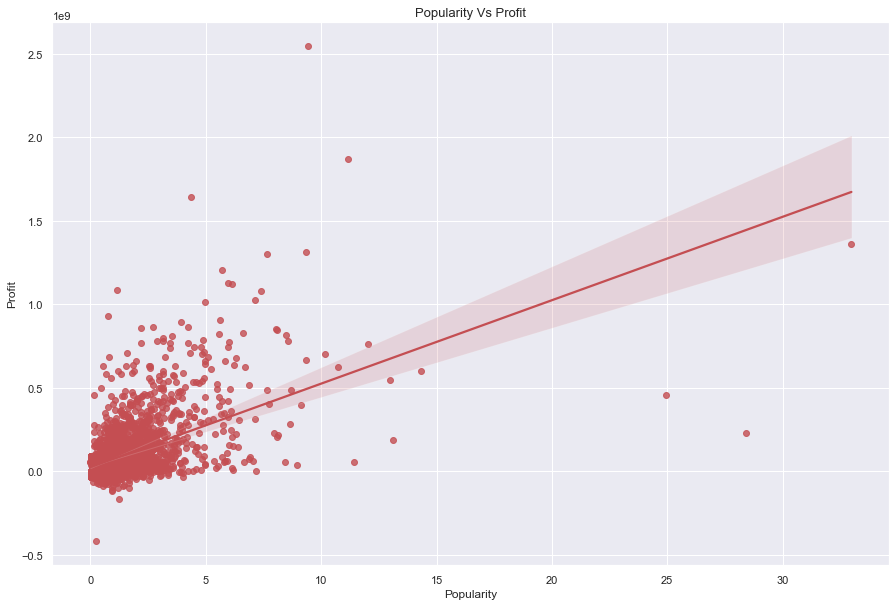

In [33]:
df['Profit'] = df['revenue'] - df['budget']

ax = sns.regplot(x=df['popularity'],y=df['Profit'],color='r')
ax.set_title("Popularity Vs Profit",fontsize=13)
ax.set_xlabel("Popularity",fontsize=12)
ax.set_ylabel("Profit",fontsize=12)

sns.set(rc={'figure.figsize':(10,5)})
sns.set_style("darkgrid")
data_corr = df.corr()

print("Correlation Between Popularity And Profit : ",data_corr.loc['popularity','Profit'])

##### >>> As we see Popularity and profit have positive correlation(0.53).

##### >>> It means that movie with high popularity tends to earn high profit.

### Reasearch Question 9 (The relationship between runtime and vote average)

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


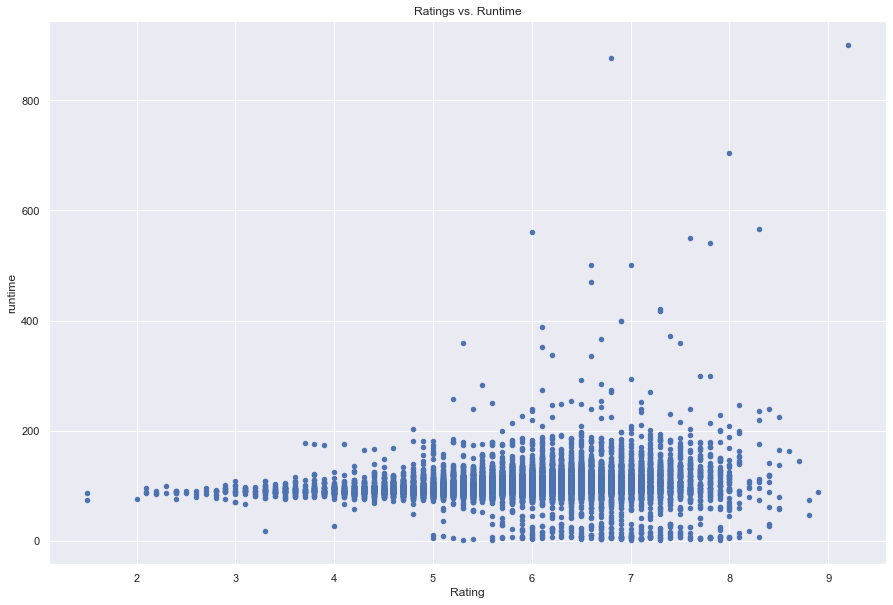

In [34]:
# Plot scatter plot of these two columns
df.plot(x='vote_average', y='runtime', kind='scatter', figsize=(15,10))
plt.title('Ratings vs. Runtime')
plt.xlabel('Rating');

### Reasearch Question 10 (Vote average changes according to the release year.)

Correlation Between Release Year And Vote Average :  -0.11757558609467468


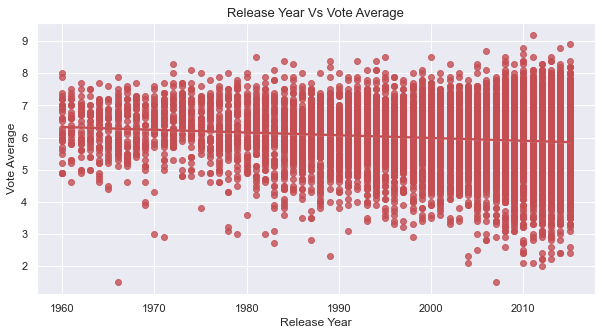

In [35]:
ax = sns.regplot(x=df['release_year'], y=df['vote_average'],color='r')
ax.set_title("Release Year Vs Vote Average",fontsize=13)
ax.set_xlabel("Release Year",fontsize=12)
ax.set_ylabel("Vote Average",fontsize=12)

sns.set_style("darkgrid",rc={'figure.figsize':(10,5)})
print("Correlation Between Release Year And Vote Average : ",data_corr.loc['release_year','vote_average'])

### Research Question 11 (Features are associated with movies with high revenue)

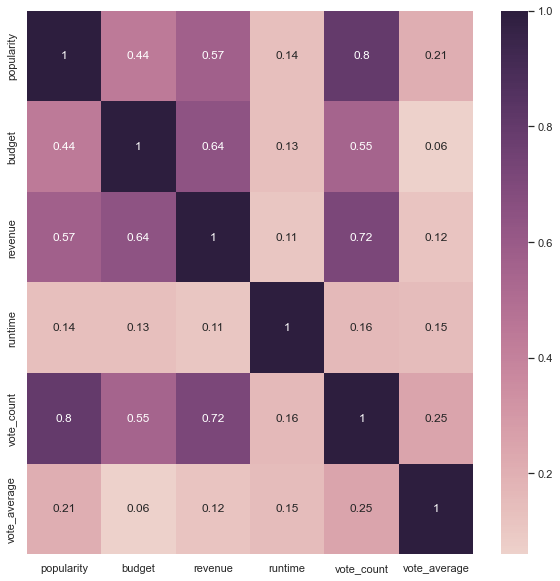

In [36]:
def plot_correlation_map( df ):
    fig , ax = plt.subplots( figsize =( 10 , 10 ) )
    fig = sns.heatmap(df.corr(),cmap = sns.cubehelix_palette(as_cmap = True ), annot = True)
plot_correlation_map(df[['popularity','budget','revenue','runtime','vote_count','vote_average']])

<a id='conclusions'></a>
## Conclusions

### Results :  
> our data suggests that :

> 1. year 2014 year has the highest release of movies (700)
> 2. the higher number of release in september and october months. 
> 3. 'Avatar' movie earned the most revenue in all, making over 2.5B in this
dataset.
> 4. 25% of movies have a runtime of less than 95 minutes, 
50% of movies have a runtime of less than 109 minutes. (median), 
75% of movies have a runtime of less than 119 minutes
> 5. the Movie Which Has Highest budget is The Warrior's Way and the Movie Which Has Lowest budget is Fear Clinic 
> 6. we can say that movies in the range of 150-200 runtime are more popular than other runtime movies. Because it is boring to see the long duration movies. 
> 7. movie with high popularity tends to earn high profit.
> 8. For short films, it can be rated medium to high.

### Limitations :

> there are a couple of limitations with our data 

> 1. This analysis was done considering the movies that made big profits.
> 2. While this isn't entirely error-free, following these suggestions will increase the chances of your movie being a hit.
> 3. Furthermore, we cannot be sure that the data provided is completely accurate and up-to-date.
> 4. As mentioned above, the Budget and Revenue columns do not have currency units. Depending on the country of origin, different films may have budgets set in different currencies.
> 5. This creates a disparity that can misrepresent the overall analysis. 
> 6. Removing rows with missing values also affected the overall analysis.